In [1]:
data <- read.csv("new_chr15_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
111425,chr15_3189300,3189200,3,167,230,83.919598,82.733813
50187,chr15_3189300,3189200,2,27,43,13.567839,15.467626
1,chr15_3189300,3189200,1,5,5,2.512563,1.798561
111426,chr15_3190800,3190700,3,104,167,72.222222,69.583333
50188,chr15_3190800,3190700,2,34,56,23.611111,23.333333
2,chr15_3190800,3190700,1,6,17,4.166667,7.083333
111427,chr15_3192500,3192400,3,193,315,86.547085,87.500000
50189,chr15_3192500,3192400,2,24,36,10.762332,10.000000
3,chr15_3192500,3192400,1,6,9,2.690583,2.500000
50190,chr15_3196500,3196400,2,14,21,100.000000,100.000000


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
15493,chr15_3189300,3189200,167,27,5
15501,chr15_3190800,3190700,104,34,6
15508,chr15_3192500,3192400,193,24,6
15539,chr15_3196500,3196400,0,14,0
15556,chr15_3199200,3199100,140,43,0
15562,chr15_3200500,3200400,208,5,0
15563,chr15_3200700,3200600,87,28,4
15577,chr15_3203200,3203100,143,48,32
15586,chr15_3204300,3204200,162,31,7
15587,chr15_3204400,3204300,77,24,0


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 65487"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
15493,chr15_3189300,3189200,167,27,5,0
15501,chr15_3190800,3190700,104,34,6,1500
15508,chr15_3192500,3192400,193,24,6,1700
15539,chr15_3196500,3196400,0,14,0,4000
15556,chr15_3199200,3199100,140,43,0,2700
15562,chr15_3200500,3200400,208,5,0,1300
15563,chr15_3200700,3200600,87,28,4,200
15577,chr15_3203200,3203100,143,48,32,2500
15586,chr15_3204300,3204200,162,31,7,1100
15587,chr15_3204400,3204300,77,24,0,100


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
15493,chr15_3189300,3189200,167,27,5,0
15587,chr15_3204400,3204300,77,24,0,100
15984,chr15_3264000,3263900,0,12,5,100
16006,chr15_3266800,3266700,183,22,0,100
16095,chr15_3282800,3282700,71,0,0,100
16206,chr15_3304500,3304400,113,28,0,100


,binID,start,high,medium,low,dist
15587,chr15_3204400,3204300,77,24,0,100
15984,chr15_3264000,3263900,0,12,5,100
16006,chr15_3266800,3266700,183,22,0,100
16095,chr15_3282800,3282700,71,0,0,100
16206,chr15_3304500,3304400,113,28,0,100
16301,chr15_3320200,3320100,24,14,0,100


[1] 9267

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3204200   3204300   3263800   3263900   3266600   3266700   3282600
    [8]   3282700   3304300   3304400   3320000   3320100   3320200   3361500
   [15]   3361600   3361900   3362000   3363200   3363300   3369900   3370000
   [22]   3371800   3371900   3372000   3372100   3373400   3373500   3373600
   [29]   3457600   3457700   3506200   3506300   3548500   3548600   3548700
   [36]   3549500   3549600   3549700   3580500   3580600   3618900   3619000
   [43]   3640400   3640500   3700800   3700900   3707000   3707100   3712300
   [50]   3712400   3764300   3764400   3778100   3778200   3806500   3806600
   [57]   3807400   3807500   3807600   3807800   3807900   3821000   3821100
   [64]   3829100   3829200   3920300   3920400   3921000   3921100   3927200
   [71]   3927300   3940700   3940800   3962400   3962500   3969600   3969700
   [78]   3969800   3969900   3980700   3980800   3994900   3995000   3996200
   [85]   3996300   4035300   4035400   4045200   4045300   4048300   4048400
   [92]   4074700   4074800   4075600   4075700   4081700   4081800   4103800
   [99]   4103900   4126900   4127000   4130000   4130100   4139600   4139700
  [106]   4155100   4155200   4217600   4217700   4227600   4227700   4252200
  [113]   4252300   4280400   4280500   4280600   4286100   4286200   4286300
  [120]   4286400   4308500   4308600   4342900   4343000   4353900   4354000
  [127]   4356200   4356300   4361100   4361200   4452400   4452500   4480600
  [134]   4480700   4490000   4490100   4539500   4539600   4549200   4549300
  [141]   4551800   4551900   4557900   4558000   4559300   4559400   4559600
  [148]   4559700   4596800   4596900   4597500   4597600   4597700   4609300
  [155]   4609400   4611100   4611200   4621800   4621900   4654400   4654500
  [162]   4684900   4685000   4685700   4685800   4727100   4727200   4727300
  [169]   4742000   4742100   4749000   4749100   4754200   4754300   4759300
  [176]   4759400   4775700   4775800   4781600   4781700   4836700   4836800
  [183]   4852400   4852500   4859300   4859400   4865000   4865100   4865300
  [190]   4865400   4885100   4885200   4885300   4885400   4885900   4886000
  [197]   4908900   4909000   4914200   4914300   4916600   4916700   4934300
  [204]   4934400   4934500   4949300   4949400   4956600   4956700   4956800
  [211]   4959000   4959100   4979400   4979500   4987800   4987900   4995600
  [218]   4995700   5035200   5035300   5049500   5049600   5069900   5070000
  [225]   5084100   5084200   5089900   5090000   5099000   5099100   5103100
  [232]   5103200   5111300   5111400   5114500   5114600   5115200   5115300
  [239]   5131200   5131300   5136500   5136600   5141200   5141300   5144600
  [246]   5144700   5153900   5154000   5154200   5154300   5154400   5154700
  [253]   5154800   5162900   5163000   5163100   5175000   5175100   5177500
  [260]   5177600   5177700   5183800   5183900   5205200   5205300   5235500
  [267]   5235600   5236600   5236700   5238000   5238100   5240400   5240500
  [274]   5242700   5242800   5243400   5243500   5243600   5247900   5248000
  [281]   5262400   5262500   5266900   5267000   5267100   5267200   5287100
  [288]   5287200   5312800   5312900   5338100   5338200   5342600   5342700
  [295]   5343700   5343800   5378200   5378300   5378600   5378700   5378800
  [302]   5378900   5379000   5379600   5379700   5389100   5389200   5433500
  [309]   5433600   5455000   5455100   5464600   5464700   5466900   5467000
  [316]   5547800   5547900   5549700   5549800   5580200   5580300   5582200
  [323]   5582300   5632600   5632700   5657100   5657200   5682000   5682100
  [330]   5685700   5685800   5713500   5713600   5734500   5734600   5757600
  [337]   5757700   5788900   5789000   5802300   5802400   5805200   5805300
  [344]   5807500   5807600   5807700   5841900   5842000   5866800   5866900
  [351]   5877800   5877900   5880600   5880700   5885000   5885100   5885200
  [358]   5885400   588550

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
15586,chr15_3204300,3204200,162,31,7
15587,chr15_3204400,3204300,77,24,0
15983,chr15_3263900,3263800,42,4,2
15984,chr15_3264000,3263900,0,12,5
16005,chr15_3266700,3266600,125,52,18
16006,chr15_3266800,3266700,183,22,0
16093,chr15_3282700,3282600,201,36,8
16095,chr15_3282800,3282700,71,0,0
16205,chr15_3304400,3304300,163,36,0
16206,chr15_3304500,3304400,113,28,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
15587,chr15_3204400,3204300,0.0442910291211544
15983,chr15_3263900,3263800,0
15984,chr15_3264000,3263900,7.32101799986983e-10
16005,chr15_3266700,3266600,0
16006,chr15_3266800,3266700,1.34094838600419e-09
16093,chr15_3282700,3282600,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
16206,chr15_3304500,3304400,0.78715419271722
16442,chr15_3362100,3362000,0.610833347645864
16451,chr15_3363400,3363300,0.909685468290382
16493,chr15_3372200,3372100,0.369523421465714
17313,chr15_3506400,3506300,0.90297751271699
17543,chr15_3548800,3548700,0.592980098017427


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3304300   3304400   3361900   3362000   3363200   3363300   3372000
   [8]   3372100   3506200   3506300   3548600   3548700   3549500   3549600
  [15]   3580500   3580600   3618900   3619000   3640400   3640500   3707000
  [22]   3707100   3764300   3764400   3806500   3806600   3807400   3807500
  [29]   3807600   3807800   3807900   3829100   3829200   3921000   3921100
  [36]   3969700   3969800   3969900   4035300   4035400   4081700   4081800
  [43]   4103800   4103900   4130000   4130100   4139600   4139700   4155100
  [50]   4155200   4227600   4227700   4252200   4252300   4280400   4280500
  [57]   4280600   4286100   4286200   4286300   4286400   4356200   4356300
  [64]   4361100   4361200   4452400   4452500   4480600   4480700   4539500
  [71]   4539600   4551800   4551900   4557900   4558000   4596800   4596900
  [78]   4597500   4597600   4597700   4654400   4654500   4685700   4685800
  [85]   4727100   4727200   4742000   4742100   4749000   4749100   4759300
  [92]   4759400   4852400   4852500   4859300   4859400   4865000   4865100
  [99]   4865300   4865400   4885300   4885400   4914200   4914300   4949300
 [106]   4949400   4956700   4956800   5141200   5141300   5154300   5154400
 [113]   5162900   5163000   5205200   5205300   5236600   5236700   5238000
 [120]   5238100   5240400   5240500   5243400   5243500   5243600   5247900
 [127]   5248000   5266900   5267000   5338100   5338200   5378900   5379000
 [134]   5379600   5379700   5389100   5389200   5464600   5464700   5466900
 [141]   5467000   5547800   5547900   5549700   5549800   5582200   5582300
 [148]   5632600   5632700   5682000   5682100   5734500   5734600   5788900
 [155]   5789000   5802300   5802400   5805200   5805300   5866800   5866900
 [162]   5877800   5877900   5880600   5880700   5885400   5885500   5885900
 [169]   5886000   5886800   5886900   5922100   5922200   5966600   5966700
 [176]   6022800   6022900   6066000   6066100   6227800   6227900   6230400
 [183]   6230500   6274400   6274500   6276000   6276100   6288000   6288100
 [190]   6319300   6319400   6341400   6341500   6387500   6387600   6387700
 [197]   6387800   6397100   6397200   6405800   6405900   6500300   6500400
 [204]   6511800   6511900   6536400   6536500   6567500   6567600   6580000
 [211]   6580100   6596400   6596500   6611200   6611300   6613400   6613500
 [218]   6643400   6643500   6649700   6649800   6654600   6654700   6680300
 [225]   6680400   6680500   6681000   6681100   6681300   6681400   6685000
 [232]   6685100   6685200   6690600   6690700   6698500   6698600   6709100
 [239]   6709200   6709500   6709600   6710300   6710400   6738100   6738200
 [246]   6743800   6743900   6747900   6748000   6765900   6766000   6768800
 [253]   6768900   6785800   6785900   6787500   6787600   6803700   6803800
 [260]   6805600   6805700   6810300   6810400   6818300   6818400   6844000
 [267]   6844100   6844200   6864600   6864700   6876700   6876800   6880700
 [274]   6880800   6880900   6881000   6909400   6909500   6948600   6948700
 [281]   6948900   6949000   6958600   6958700   6990900   6991000   7066500
 [288]   7066600   7090300   7090400   7109500   7109600   7131100   7131200
 [295]   7134900   7135000   7138200   7138300   7138900   7139000   7154300
 [302]   7154400   7171400   7171500   7177200   7177300   7184200   7184300
 [309]   7184400   7184500   7203100   7203200   7209700   7209800   7321700
 [316]   7321800   7350100   7350200   7350300   7389000   7389100   7397900
 [323]   7398000   7399700   7399800   7430100   7430200   7454100   7454200
 [330]   7470800   7470900   7477800   7477900   7478400   7478500   7497700
 [337]   7497800   7600100   7600200   7643600   7643700   7649500   7649600
 [344]   7687300   7687400   7704200   7704300   7743800   7743900   7779500
 [351]   7779600   7799300   7799400   7800000   7800100   7808500   7808600
 [358]   7819800   7819900   7820000   7864000   7864100   7878200   7878300

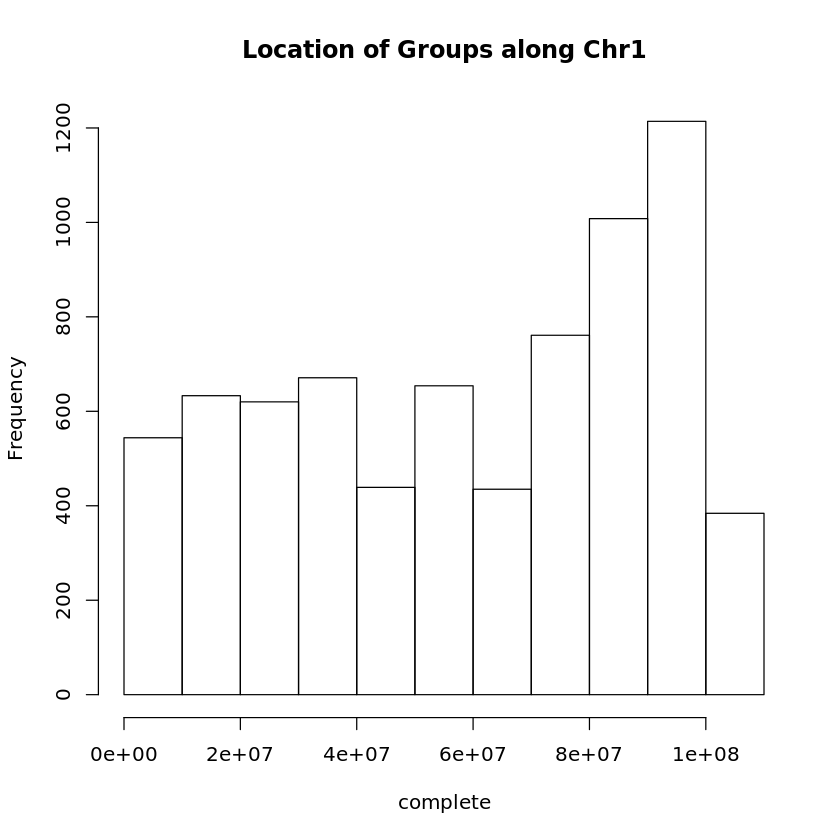

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
16205,chr15_3304400,3304300,163,36,0
16206,chr15_3304500,3304400,113,28,0
16441,chr15_3362000,3361900,99,14,2
16442,chr15_3362100,3362000,49,7,0
16449,chr15_3363300,3363200,24,5,0
16451,chr15_3363400,3363300,56,9,0
16491,chr15_3372100,3372000,111,14,2
16493,chr15_3372200,3372100,99,10,0
17311,chr15_3506300,3506200,189,36,7
17313,chr15_3506400,3506300,133,23,4


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 7363"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr15_3549700,3549600,39,0,0
110,gap 7,0,100,100,100
22,chr15_3580600,3580500,159,28,14
23,chr15_3580700,3580600,104,30,8
112,gap 8,0,100,100,100
25,chr15_3619000,3618900,136,0,0
26,chr15_3619100,3619000,168,3,4
113,gap 9,0,100,100,100
28,chr15_3640500,3640400,24,36,53
29,chr15_3640600,3640500,36,27,63


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
16205,chr15_3304400,3304300,163,36,0
2,chr15_3304500,3304400,113,28,0
1,gap 1,0,100,100,100
4,chr15_3362000,3361900,99,14,2
5,chr15_3362100,3362000,49,7,0
11,gap 2,0,100,100,100


,binID,start,high,medium,low
10792,chr15_103845300,103845200,66,18,3
10793,chr15_103845400,103845300,65,13,0
10794,chr15_103845500,103845400,127,27,0
14007,gap 3434,0,100,100,100
10796,chr15_103901800,103901700,49,14,4
10797,chr15_103901900,103901800,61,27,5


In [20]:
write.csv(part, "chr15_A_group.csv")

[1] "Total Number of groups: 3435"

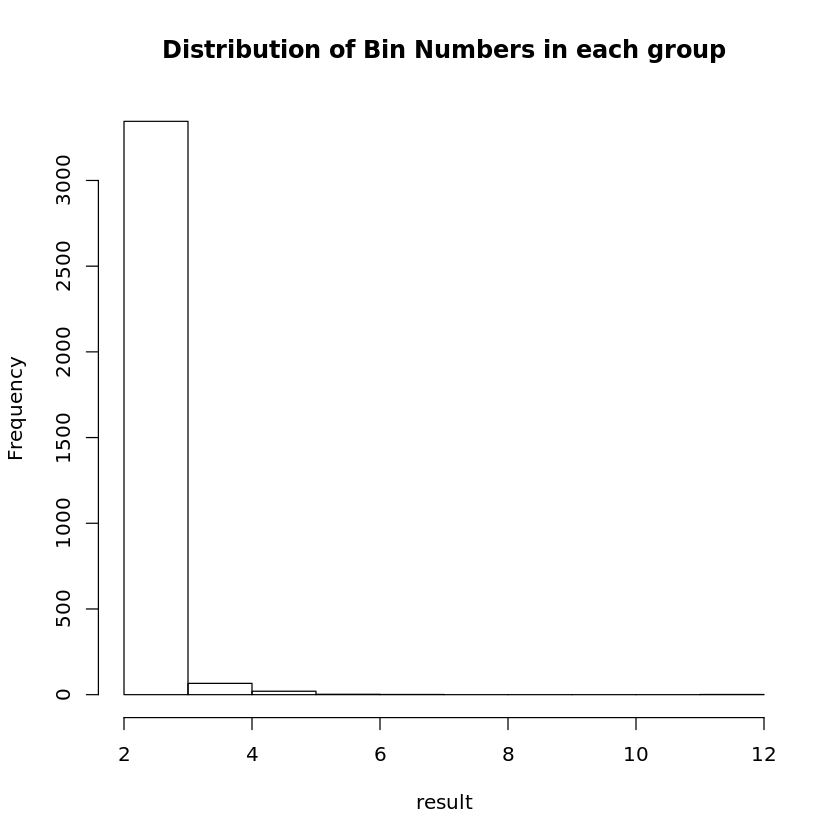

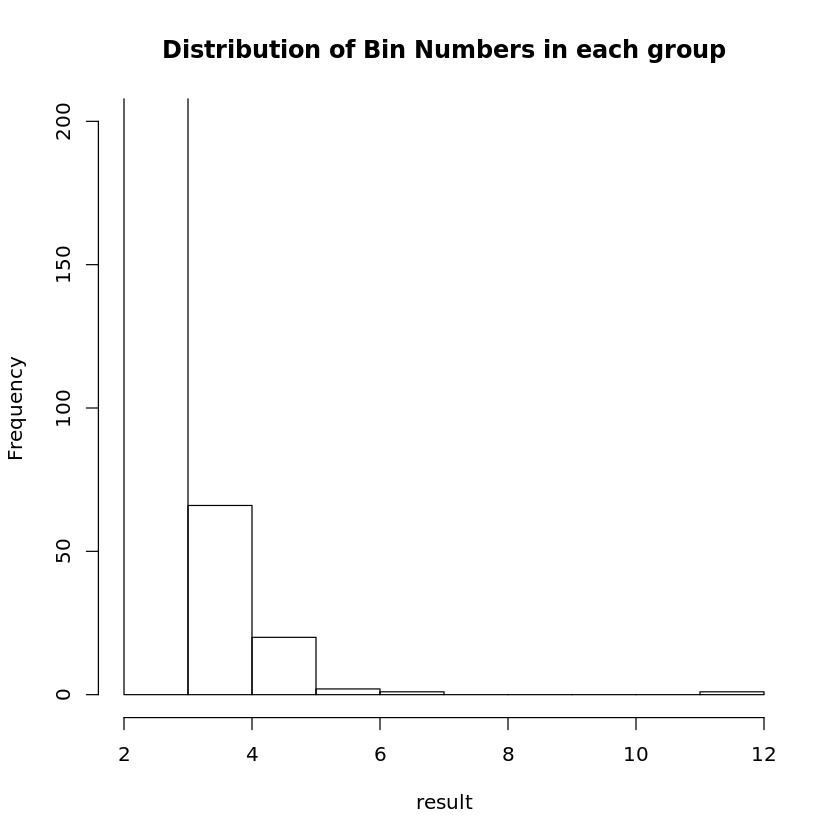

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")